test stratified/knn regressor and Naive Bayes

In [6]:
import sys
sys.path.append("C:\\Users\\guilh\\OneDrive\\Documentos\\GitHub\\sistemasinteligentes")
import numpy as np
import pandas as pd
from src.si.data.dataset import Dataset
from src.io.csv_file import read_csv, write_csv 
from src.io.data_file import *
from src.si.decomposition.pca import PCA
from src.si.statistics.euclidean_distance import euclidean_distance
from src.si.clustering.kmeans import Kmeans
import matplotlib.pyplot as plt
from src.si.metrics.accuracy import accuracy
from src.si.metrics.rmse import rmse
from src.si.model_selection import *
from src.si.model_selection.split import train_test_split
from src.si.model_selection.split import stratified_train_test_split
from collections import Counter
from src.si.models.knn_regressor import KNNRegressor
from src.si.models.categorical_nb import CategoricalNB
from src.si.models.knn_classifier import KNNClassifier


Precisão modelo feito por outros: 0.3333333333333333


In [11]:
iris_dataset = read_csv(r"C:\Users\guilh\OneDrive\Documentos\GitHub\sistemasinteligentes\datasets\iris\iris.csv", features=True, label=True)
iris_dataset.summary()

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054000,3.758667,1.198667
variance,0.681122,0.186751,3.092425,0.578532
median,5.800000,3.000000,4.350000,1.300000
max,7.900000,4.400000,6.900000,2.500000
min,4.300000,2.000000,1.000000,0.100000


In [12]:
labels, counts = np.unique(iris_dataset.y, return_counts=True)

In [13]:
dataset_train, dataset_test = stratified_train_test_split(iris_dataset, test_size=0.2)
labels_train, counts_train = np.unique(dataset_train.y, return_counts=True)
labels_test, counts_test = np.unique(dataset_test.y, return_counts=True)


In [14]:
dataset_train_simple, dataset_test_simple = train_test_split(iris_dataset, test_size=0.2)
labels_train_simple, counts_train_simple = np.unique(dataset_train_simple.y, return_counts=True)
labels_test_simple, counts_test_simple = np.unique(dataset_test_simple.y, return_counts=True)

**Comparation**

In [16]:
print("noraml",labels,counts)
print("stratified",labels_train,counts_train)
print("stratified",labels_test,counts_test)
print("withou stratified",labels_train_simple,counts_train_simple)
print("withou stratified",labels_test_simple,counts_test_simple)

noraml ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] [50 50 50]
stratified ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] [40 40 40]
stratified ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] [10 10 10]
withou stratified ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] [40 41 39]
withou stratified ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] [10  9 11]


# knn regressor

In [19]:
filename_cpu = r"C:\Users\guilh\OneDrive\Documentos\GitHub\sistemasinteligentes\datasets\cpu\cpu.csv"
cpu=read_csv(filename_cpu, sep=",",features=True,label=True)
train_data, test_data = train_test_split(cpu, test_size=0.2, random_state=42)
knn_regressor = KNNRegressor(k=3)  
knn_regressor.fit(train_data)
score = knn_regressor.score(test_data)
print(f'The rmse of the model is: {score}')

The rmse of the model is: 81.36259969252635


Sklearn results

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

dataset_train, dataset_test = train_test_split(cpu, test_size=0.2)

# initialize the KNN classifier
knn = KNeighborsRegressor(n_neighbors=3)

# fit the model to the train dataset
knn.fit(dataset_train.X, dataset_train.y)

# evaluate the model on the test dataset
score = mean_squared_error(dataset_test.y, knn.predict(dataset_test.X), squared=False)
print(f'The RMSE of the model is: {score}')
    

The RMSE of the model is: 81.36021813423898


# knn classifier

In [21]:
# knn classifier
k = 2
kmeans = KNNClassifier(k)
kmeans.fit(dataset_train_simple)
predictions = kmeans.predict(dataset_test_simple)
print(predictions,kmeans.score(dataset_test_simple))


['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa'] 1.0


In [25]:
# kmeans
k = 4
kmeans = Kmeans(k)
distances = kmeans.fit_transform(iris_dataset)
predictions = kmeans.predict(iris_dataset)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3, 0, 3, 3, 3,
       2, 3, 3, 2, 2, 2, 3, 3, 3, 0, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2], dtype=int64)

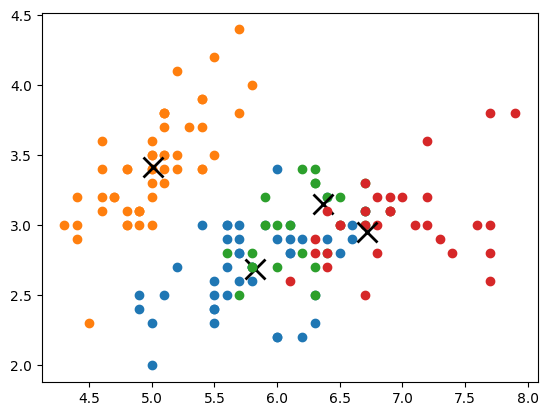

In [26]:
for i in range(k):
    k_sample = iris_dataset.X[np.where(predictions == i)]
    plt.plot(k_sample[:, 0], k_sample[:, 1], 'o')
    lines = plt.plot(kmeans.centroids[i, 0], kmeans.centroids[i, 1], 'kx')
    plt.setp(lines, ms=15.0)
    plt.setp(lines, mew=2.0)

plt.show()

# Naive Bayes

the module categorical_nb.py have the code, test and compartion with sklearn